In [223]:
IMAGE_NAME = "graph1" # 변경 ㄱㄴ
IMAGE_PATH = "./data/image/" + IMAGE_NAME + ".png" # 건들 ㄴㄴ
print("Data: "+IMAGE_PATH)

Data: ./data/image/graph1.png


## 이미지 크기 추출

In [224]:
import cv2

# 전역 변수
points_selected = []  # 선택된 좌표를 저장할 리스트
img_copy = None       # 원본 이미지의 복사본

# 마우스 콜백 함수
def select_points(event, x, y, flags, param):
    global points_selected, img_copy
    if event == cv2.EVENT_LBUTTONDOWN:
        if len(points_selected) < 2:
            points_selected.append((x, y))
            cv2.circle(img_copy, (x, y), 5, (0, 255, 0), -1)
        if len(points_selected) == 2:
            x1, y1 = points_selected[0]
            x2, y2 = points_selected[1]
            cv2.rectangle(img_copy, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Save the result instead of displaying it

# 이미지 로드
image_path = IMAGE_PATH  # Replace with your image path
img = cv2.imread(image_path)

if img is None:
    print(f"Error: Could not load image at {image_path}.")
    exit()

img_copy = img.copy()

# GUI 창 열기 및 마우스 이벤트 연결
cv2.namedWindow("Image")  # Create a window
cv2.setMouseCallback("Image", select_points)

print("이미지에서 두 점을 클릭하여 영역을 선택하세요. (왼쪽 상단 -> 오른쪽 하단)")

# 두 점이 선택될 때까지 대기
while len(points_selected) < 2:
    cv2.imshow("Image", img_copy)
    if cv2.waitKey(1) & 0xFF == 27:  # Press 'Esc' to exit if needed
        break

# 선택된 좌표 출력
if len(points_selected) == 2:
    (x1, y1), (x2, y2) = points_selected
    print(f"선택된 좌표: x1={x1}, y1={y1}, x2={x2}, y2={y2}")

cv2.destroyAllWindows()

이미지에서 두 점을 클릭하여 영역을 선택하세요. (왼쪽 상단 -> 오른쪽 하단)
선택된 좌표: x1=161, y1=32, x2=932, y2=606


[2025/03/18 22:03:20] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\mulso/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\mulso/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320',

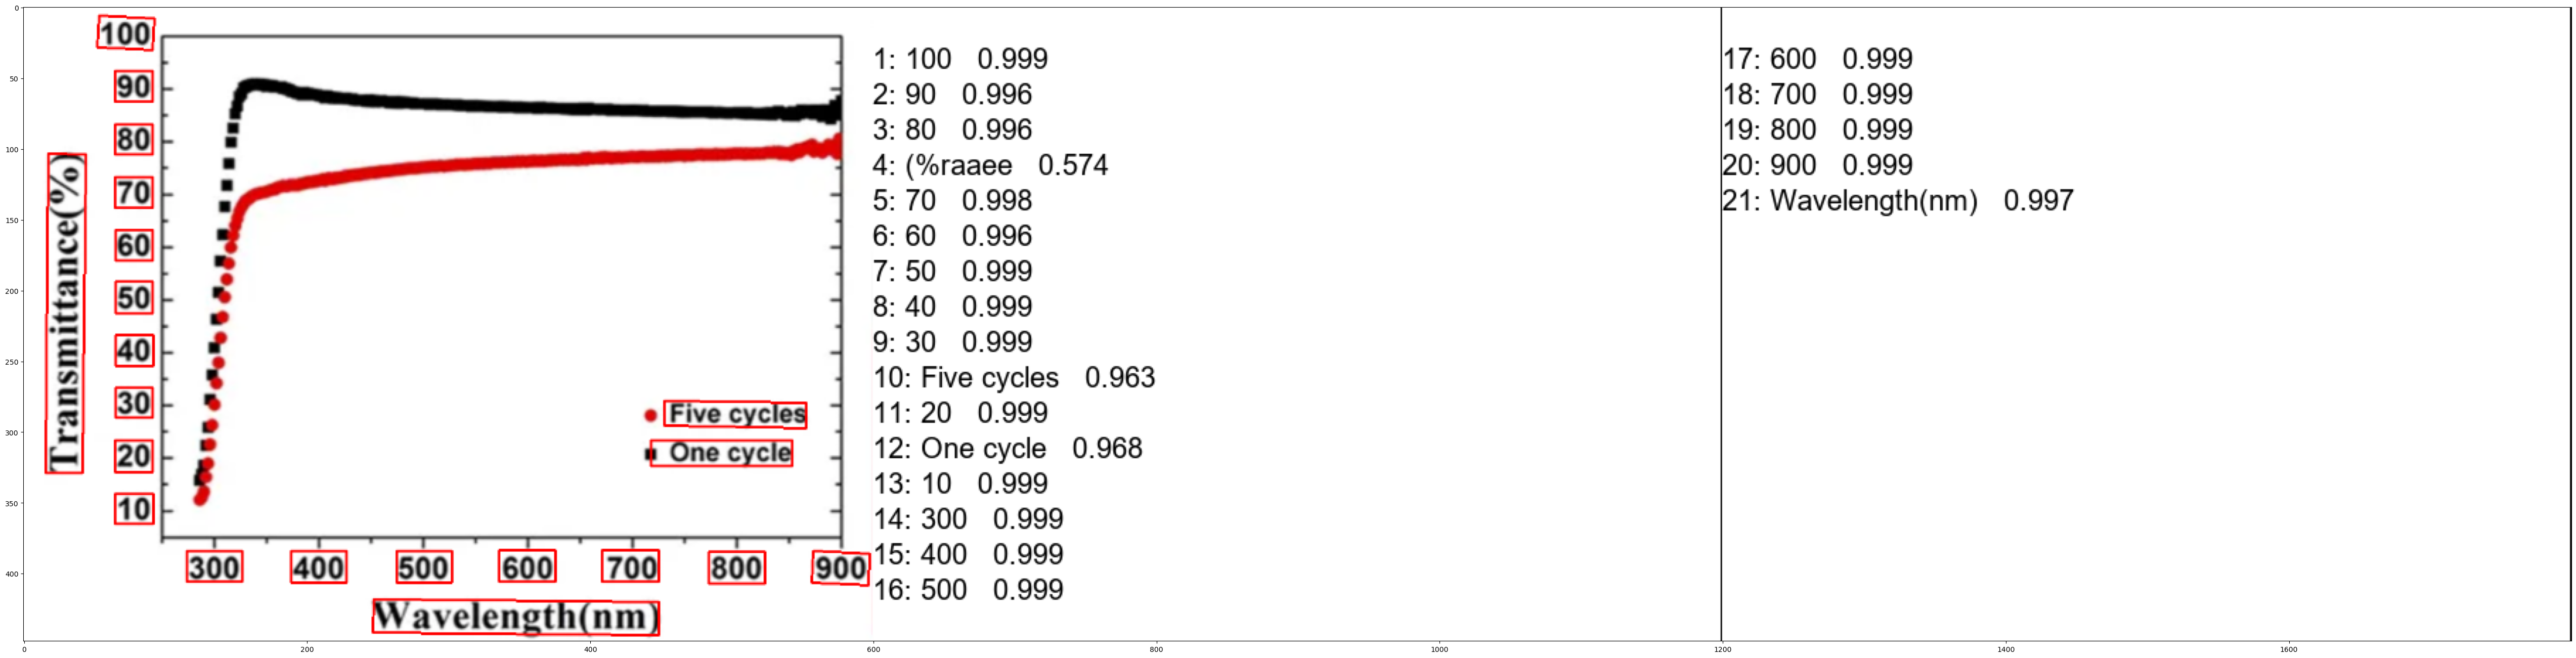

In [225]:
from paddleocr import PaddleOCR, draw_ocr
from paddleocr.paddleocr import MODEL_URLS
import os
import cv2
from matplotlib import pyplot as plt
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

ocr = PaddleOCR(lang="en")
result = ocr.ocr(IMAGE_PATH, cls=False)

# Extracting detected components
res = result[0]
print(type(res))
boxes = [res[i][0] for i in range(len(result[0]))] # 
texts = [res[i][1][0] for i in range(len(result[0]))]
scores = [float(res[i][1][1]) for i in range(len(result[0]))]
#for res in result:
print(boxes[0])
print(texts[0])
print(scores[0])#, Text: {res[1]}

for box, text, score in zip(boxes, texts, scores):
    print(box, text, score)

# Specifying font path for draw_ocr method
font_path = os.path.join("C:\Windows\Fonts", 'latin.ttf')

# imports image
img = cv2.imread(IMAGE_PATH) 

# reorders the color channelsa
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

# Visualize our image and detections
# resizing display area
plt.figure(figsize=(65,65))

# draw annotations on image
annotated = draw_ocr(img, boxes, texts, scores, font_path="C:/Windows/Fonts/Arial.ttf") 

# show the image using matplotlib
plt.imshow(annotated) 

[2025/03/18 22:03:24] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\mulso/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\mulso/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320',

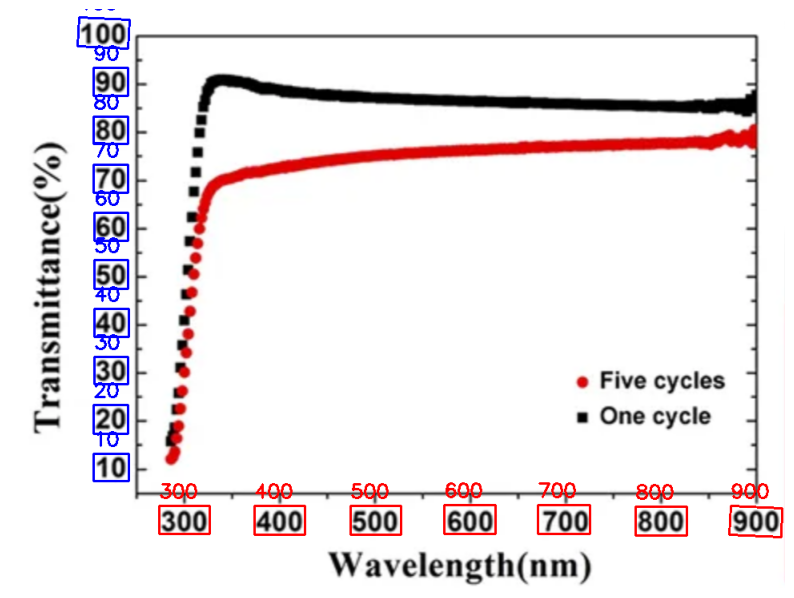

In [226]:
from paddleocr import PaddleOCR, draw_ocr
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

# PaddleOCR 모델 초기화
ocr = PaddleOCR(lang="en")

# OCR 수행
result = ocr.ocr(IMAGE_PATH, cls=False)

# 숫자 바운딩 박스 저장 리스트
number_boxes = []

# OCR 결과에서 숫자 필터링
for res in result[0]:
    box, (text, score) = res
    if text.isdigit():  # 숫자만 필터링
        number_boxes.append({"text": int(text), "box": np.array(box, dtype=np.int32)})

# 두 개의 그룹 저장 (X축 숫자, Y축 숫자)
x_axis_numbers = []
y_axis_numbers = []

# 기준을 통한 그룹화
for item in number_boxes:
    text = item["text"]
    box = item["box"]

    # 우측 상단과 우측 하단의 x, y 좌표
    x_right_avg = (box[1][0] + box[2][0]) / 2  # 우측 상단 & 우측 하단 x 좌표 평균
    y_right_avg = (box[1][1] + box[2][1]) / 2  # 우측 상단 & 우측 하단 y 좌표 평균

    # Y축 숫자 (X 좌표 기준 그룹화)
    if not y_axis_numbers or abs(y_axis_numbers[-1]["avg_x"] - x_right_avg) < 10:
        y_axis_numbers.append({"text": text, "avg_x": x_right_avg, "box": box})
    else:
        x_axis_numbers.append({"text": text, "avg_y": y_right_avg, "box": box})

# 출력
print("🔹 Y축 값 (세로 값, X 좌표 기준 그룹화):")
for item in y_axis_numbers:
    print(f"  {item['text']} (평균 X 좌표: {item['avg_x']})")

print("\n🔹 X축 값 (가로 값, Y 좌표 기준 그룹화):")
for item in x_axis_numbers:
    print(f"  {item['text']} (평균 Y 좌표: {item['avg_y']})")

# 이미지 불러오기 및 시각화
img = cv2.imread(IMAGE_PATH)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Y축 (파란색), X축 (빨간색) 바운딩 박스 표시
for item in y_axis_numbers:
    cv2.polylines(img, [item["box"]], isClosed=True, color=(0, 0, 255), thickness=2)  # Blue
    cv2.putText(img, str(item["text"]), (item["box"][0][0], item["box"][0][1] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 2)

for item in x_axis_numbers:
    cv2.polylines(img, [item["box"]], isClosed=True, color=(255, 0, 0), thickness=2)  # Red
    cv2.putText(img, str(item["text"]), (item["box"][0][0], item["box"][0][1] - 10), 
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 0, 0), 2)

# 이미지 시각화
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()


[2025/03/18 22:03:27] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, use_mlu=False, use_gcu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\mulso/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\mulso/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320',

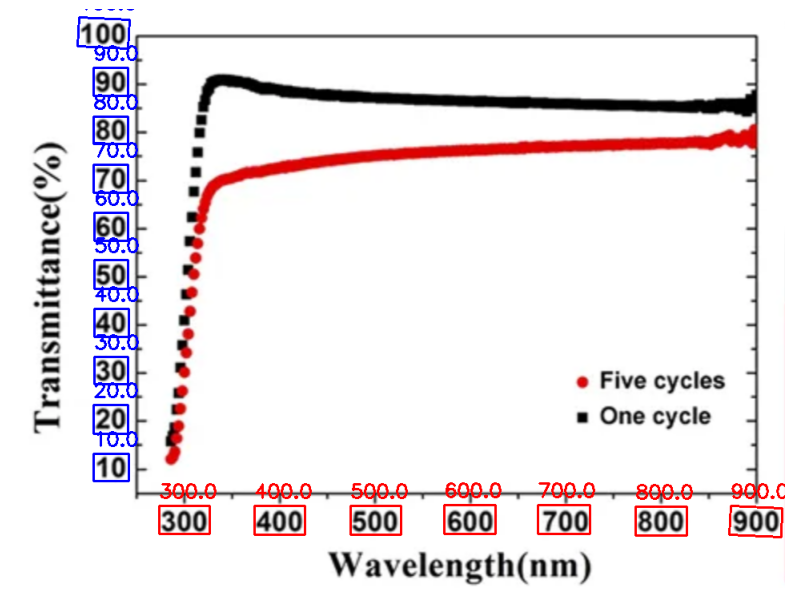

In [227]:
def is_number(text):
    try:
        float(text)  # 텍스트를 실수로 변환 시도
        return True  # 변환이 성공하면 숫자 (정수 또는 실수)
    except ValueError:
        return False  # 변환이 실패하면 숫자가 아님

# PaddleOCR 모델 초기화
ocr = PaddleOCR(lang="en")

# OCR 수행
result = ocr.ocr(image_path, cls=False)

# 숫자 바운딩 박스 저장 리스트
number_boxes = []

# OCR 결과에서 숫자 필터링
for res in result[0]:
    box, (text, score) = res
    
    if is_number(text):  # 숫자만 필터링
        # 숫자 바운딩 박스 좌표
        box = np.array(box, dtype=np.int32)
        
        # 선택된 박스 내부에 포함되는지 체크
        if (x1 <= box[0][0] <= x2 and y1 <= box[0][1] <= y2) or \
           (x1 <= box[1][0] <= x2 and y1 <= box[1][1] <= y2) or \
           (x1 <= box[2][0] <= x2 and y1 <= box[2][1] <= y2) or \
           (x1 <= box[3][0] <= x2 and y1 <= box[3][1] <= y2):
            continue
        
        # 숫자 바운딩 박스가 선택된 영역 외에 있으면 리스트에 추가
        number_boxes.append({"text": float(text), "box": box})


# 각 영역에 해당하는 숫자들을 그룹화
north = []
south = []
west = []
east = []

# 각 숫자 박스를 동서남북으로 그룹화
for item in number_boxes:
    box = item["box"]
    
    # 숫자의 중앙 좌표 계산
    center_x = (box[0][0] + box[2][0]) // 2
    center_y = (box[0][1] + box[2][1]) // 2
    
    # 동서남북으로 구분
    if center_x < x1:
        if center_y > y2:
            south.append(item)
        west.append(item)  # 서쪽
    elif center_x > x2 :
        east.append(item)  # 동쪽
    elif center_y > y2:
        south.append(item)  # 남쪽
    else:
        north.append(item)  # 북쪽

#sort
east = sorted(east, key=lambda x: x['text'])
west = sorted(west, key=lambda x: x['text'])
south = sorted(south, key=lambda x: x['text'])
north = sorted(north, key=lambda x: x['text'])

# 출력
print("🔹 West (서쪽):")
for item in west:
    print(f"  {item['text']}")

print("\n🔹 East (동쪽):")
for item in east:
    print(f"  {item['text']}")

print("\n🔹 South (남쪽):")
for item in south:
    print(f"  {item['text']}")

print("\n🔹 North (북쪽):")
for item in north:
    print(f"  {item['text']}")

# 이미지 불러오기 및 시각화
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 각 영역에 바운딩 박스 표시
def draw_boxes(img, items, color):
    for item in items:
        cv2.polylines(img, [item["box"]], isClosed=True, color=color, thickness=2)
        cv2.putText(img, str(item["text"]), (item["box"][0][0], item["box"][0][1] - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, color, 2)

# 각 영역에 바운딩 박스 그리기
draw_boxes(img, west, (0, 0, 255))  # 빨간색 서쪽
draw_boxes(img, east, (0, 255, 0))  # 초록색 동쪽
draw_boxes(img, south, (255, 0, 0))  # 파란색 남쪽
draw_boxes(img, north, (0, 255, 255))  # 노란색 북쪽

# 이미지 시각화
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis("off")
plt.show()


## 그래프 추출

### 그래프 추출(무지개)

In [228]:
import cv2
import numpy as np
import json
import os

# 이미지 로드
image_path = IMAGE_PATH  # 경로를 실제 파일 경로로 수정
img = cv2.imread(image_path)

# 이미지 로드 확인
if img is None:
    print(f"Error: Could not load image at {image_path}. Check the file path or file existence.")
    exit()

# 이미지 크기
height, width = img.shape[:2]

# 사용자에게 x축과 y축 픽셀 범위 입력 받기
print(f"이미지 크기: 너비={width}, 높이={height}")
x_pixel_min = x1
x_pixel_max = x2
y_pixel_min = y1
y_pixel_max = y2

# 입력값 검증
if not (0 <= x_pixel_min < x_pixel_max <= width):
    print("Error: x_pixel_min과 x_pixel_max가 이미지 너비 내에 있어야 합니다.")
    exit()
if not (0 <= y_pixel_min < y_pixel_max <= height):
    print("Error: y_pixel_min과 y_pixel_max가 이미지 높이 내에 있어야 합니다.")
    exit()

# x축 실제 값 범위 (250nm ~ 900nm)
x_real_min, x_real_max = south[0]['text'], south[-1]['text'] #int(input("x값 시작: ")), int(input("x값 끝 시작: "))

# y축 실제 값 범위 (0% ~ 100%)
y_real_min, y_real_max =  west[0]['text'], west[-1]['text'] 
# int(input("y값 시작: ")), int(input("y값 끝 시작: "))

# 간격 설정 (이미지 x축 길이의 100분의 1)
interval = (x_pixel_max - x_pixel_min) // 100  # x축 분석 범위의 1/100로 설정
if interval < 1:
    interval = 1  # 간격이 1픽셀 미만이 되지 않도록 보정

# 픽셀과 실제 값 간 변환 함수
def pixel_to_real(x_pixel, y_pixel):
    x_real = x_real_min + (x_pixel - x_pixel_min) * (x_real_max - x_real_min) / (x_pixel_max - x_pixel_min)
    y_real = y_real_max - (y_pixel - y_pixel_min) * (y_real_max - y_real_min) / (y_pixel_max - y_pixel_min)
    return x_real, y_real

def real_to_pixel(x_real):
    return x_pixel_min + (x_real - x_real_min) * (x_pixel_max - x_pixel_min) / (x_real_max - x_real_min)

# 픽셀 단위로 x 좌표 설정 (interval을 픽셀 단위로 사용)
x_pixel_points = np.arange(x_pixel_min, x_pixel_max + 1, interval).astype(int)

# 색상별 HSV 범위 (빨강, 주황, 노랑, 초록, 파랑, 남색, 보라)
color_ranges = {
    "red": ([0, 120, 70], [10, 255, 255], [170, 120, 70], [180, 255, 255]),
    "orange": ([10, 100, 100], [25, 255, 255], None, None),
    "yellow": ([25, 100, 100], [35, 255, 255], None, None),
    "green": ([40, 100, 100], [80, 255, 255], None, None),
    "blue": ([100, 100, 100], [130, 255, 255], None, None),
    "navy": ([130, 100, 100], [140, 255, 255], None, None),
    "purple": ([140, 100, 100], [160, 255, 255], None, None),
    "pink": ([160, 100, 100], [170, 255, 255], None, None),  # 핑크색
    "brown": ([10, 50, 50], [30, 255, 200], None, None),  # 갈색
    "gray": ([0, 0, 50], [180, 60, 200], None, None),  # 회색
    "cyan": ([80, 100, 100], [100, 255, 255], None, None),  # 청록색
    "magenta": ([140, 100, 100], [160, 255, 255], None, None),  # 자홍색
    "light_blue": ([90, 50, 50], [120, 255, 255], None, None),  # 연한 파란색
    "beige": ([20, 50, 100], [40, 255, 255], None, None),  # 베이지색
    "lime": ([35, 50, 50], [85, 255, 255], None, None),  # 라임색
    "turquoise": ([80, 50, 50], [100, 255, 255], None, None),  # 터키석색
    "peach": ([10, 50, 100], [20, 255, 255], None, None),  # 복숭아색
}


# 모든 색상에 대해 처리
results_dir = "./results"
os.makedirs(results_dir, exist_ok=True)
json_dir = os.path.join(results_dir, "json")
image_dir = os.path.join(results_dir, "image")
os.makedirs(json_dir, exist_ok=True)
os.makedirs(image_dir, exist_ok=True)

for color_name, (lower1, upper1, lower2, upper2) in color_ranges.items():
    # 원본 이미지 복사본 생성 (각 색상에 대해 독립적인 이미지 사용)
    img_color = img.copy()

    # HSV 변환
    hsv = cv2.cvtColor(img_color, cv2.COLOR_BGR2HSV)

    # 마스크 생성
    if lower2 is not None and upper2 is not None:
        mask1 = cv2.inRange(hsv, np.array(lower1), np.array(upper1))
        mask2 = cv2.inRange(hsv, np.array(lower2), np.array(upper2))
        mask = mask1 + mask2
    else:
        mask = cv2.inRange(hsv, np.array(lower1), np.array(upper1))

    # 윤곽선 찾기
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # 결과 저장 리스트
    points = []

    # 곡선 위에 X 마커 추가 및 좌표 저장
    for contour in contours:
        for x_pixel in x_pixel_points:
            y_coords = [point[0][1] for point in contour if abs(point[0][0] - x_pixel) < 5]
            if y_coords:
                y_pixel = int(np.mean(y_coords))
                # 해당 색상에만 마커 그리기
                cv2.drawMarker(img_color, (x_pixel, y_pixel), (0, 255, 0), 
                              markerType=cv2.MARKER_CROSS, markerSize=10, thickness=2)
                x_real, y_real = pixel_to_real(x_pixel, y_pixel)
                points.append({"x": x_real, "y": y_real})

    # 데이터가 존재할 경우에만 저장
    if points:
        json_save_path = os.path.join(json_dir, f"{IMAGE_NAME}/extracted_points({color_name}).json")
        os.makedirs(os.path.dirname(json_save_path), exist_ok=True)
        with open(json_save_path, "w") as f:
            json.dump(points, f, indent=4)
        print(f"json file saved at {json_save_path}")

        image_save_path = os.path.join(image_dir, f"{IMAGE_NAME}/graph_with_x_markers({color_name}).png")
        os.makedirs(os.path.dirname(image_save_path), exist_ok=True)
        cv2.imwrite(image_save_path, img_color)
        print(f"image file saved at {image_save_path}")
    else:
        print(f"No graph detected for color: {color_name}, skipping file creation.")

이미지 크기: 너비=968, 높이=723
json file saved at ./results\json\graph1/extracted_points(red).json
image file saved at ./results\image\graph1/graph_with_x_markers(red).png
No graph detected for color: orange, skipping file creation.
No graph detected for color: yellow, skipping file creation.
No graph detected for color: green, skipping file creation.
No graph detected for color: blue, skipping file creation.
No graph detected for color: navy, skipping file creation.
No graph detected for color: purple, skipping file creation.
No graph detected for color: pink, skipping file creation.
json file saved at ./results\json\graph1/extracted_points(brown).json
image file saved at ./results\image\graph1/graph_with_x_markers(brown).png
json file saved at ./results\json\graph1/extracted_points(gray).json
image file saved at ./results\image\graph1/graph_with_x_markers(gray).png
No graph detected for color: cyan, skipping file creation.
No graph detected for color: magenta, skipping file creation.
No grap

## 추출한 이미지 시각화

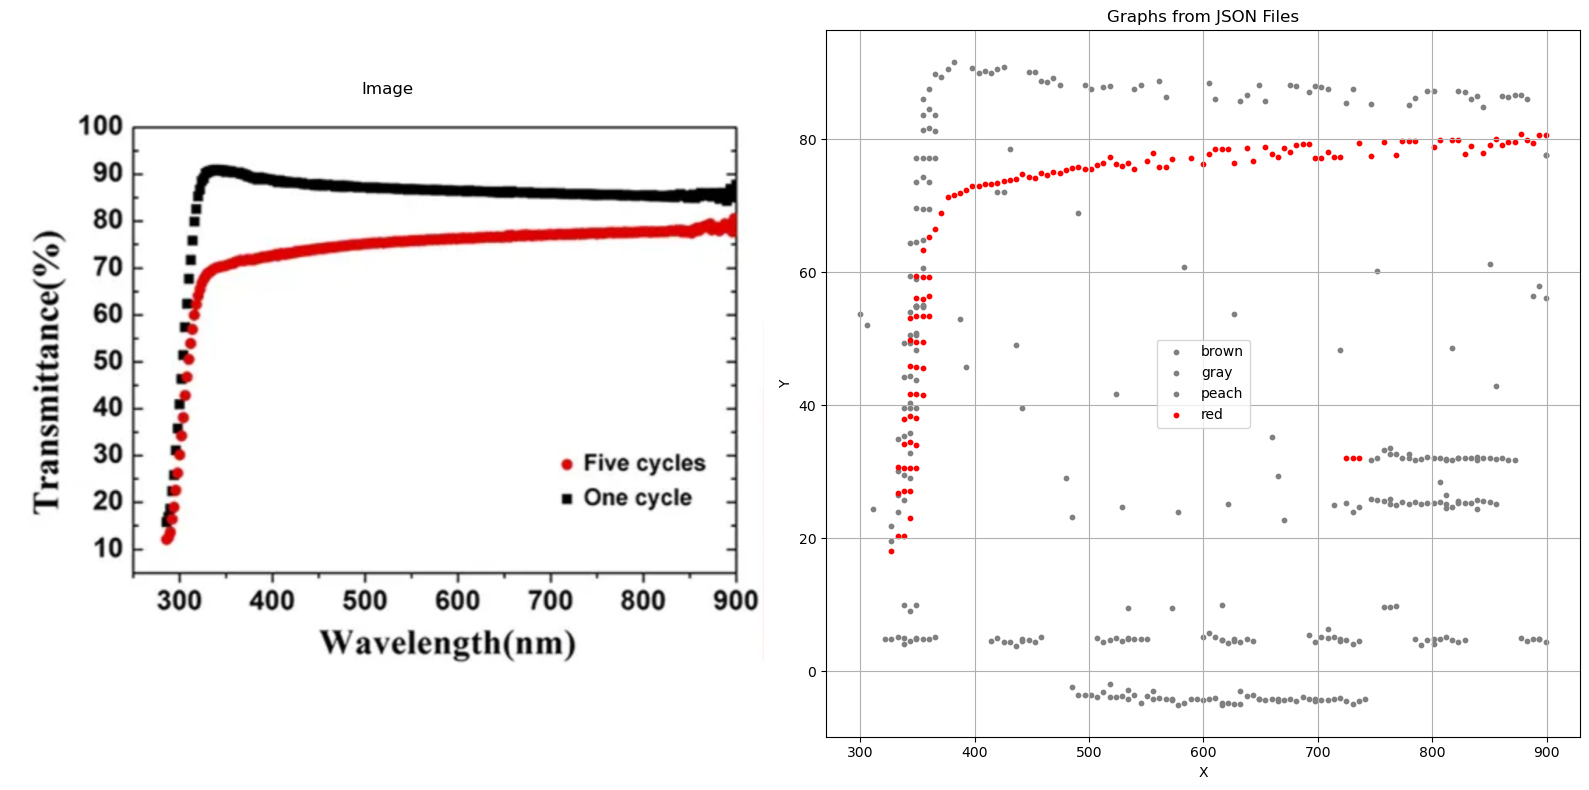

In [229]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import json
import os

# 디렉토리 경로 설정
directory_path = "./results/json/"+IMAGE_NAME

# 모든 JSON 파일 목록 가져오기
json_files = [f for f in os.listdir(directory_path) if f.endswith('.json')]

# 색상 매핑 (JSON 파일 이름에서 추출한 색상에 따라 매핑)
color_mapping = {
    "red": "red",
    "orange": "orange",
    "yellow": "yellow",
    "green": "green",
    "blue": "blue",
    "navy": "navy",
    "purple": "purple",
    "black": "black"
}

# 그래프 그리기 준비
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))  # 1행 2열 서브플롯

# 첫 번째 서브플롯 (이미지 표시)
img = mpimg.imread(IMAGE_PATH)  # 이미지 읽기
ax1.imshow(img)  # 이미지 표시
ax1.axis('off')  # 축 숨기기
ax1.set_title('Image')  # 제목 설정

# 두 번째 서브플롯 (그래프 표시)
for json_file in json_files:
    file_path = os.path.join(directory_path, json_file)
    
    # JSON 파일에서 색상 이름 추출 (예: "extracted_points(red).json" -> "red")
    color_name = json_file.split("(")[1].split(")")[0]
    
    # 색상 유효성 확인
    if color_name not in color_mapping:
        print(f"Warning: Unknown color '{color_name}' in {json_file}, using default color.")
        color = "gray"  # 기본 색상
    else:
        color = color_mapping[color_name]
    
    # JSON 파일에서 데이터 불러오기
    with open(file_path, 'r') as file:
        data = json.load(file)
    
    # x, y 좌표를 리스트로 추출 (문자열을 float로 변환)
    x_values = [float(point["x"]) for point in data]
    y_values = [float(point["y"]) for point in data]
    
    # 그래프 그리기
    ax2.scatter(x_values, y_values, color=color, s=10, label=color_name)  # 데이터 포인트 표시

# 그래프 꾸미기
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Graphs from JSON Files')
ax2.legend()  # 범례 추가
ax2.grid(True)

# 그래프 및 이미지 표시
plt.tight_layout()  # 서브플롯 간 간격 조정
plt.show()
